In [1]:
%pip install newsapi-python
%pip install --upgrade transformers
%pip install bert-for-sequence-classification
from newsapi import NewsApiClient
import json
import torch
from wordcloud import WordCloud
import pandas as pd
import os
print(torch.__version__)


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: C:\Users\franc\OneDrive\Documents\Admin\Universiteit\Akademies\Year 3\Data Science 346\Project\DS346proj\myenv\Scripts\python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: C:\Users\franc\OneDrive\Documents\Admin\Universiteit\Akademies\Year 3\Data Science 346\Project\DS346proj\myenv\Scripts\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: C:\Users\franc\OneDrive\Documents\Admin\Universiteit\Akademies\Year 3\Data Science 346\Project\DS346proj\myenv\Scripts\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


2.4.1+cpu


In [15]:
import os
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Ensure necessary NLTK resources are downloaded
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
sid = SentimentIntensityAnalyzer()



# Function to load articles from local files
def get_articles():
    # Load Harris articles from local file
    with open('dataset/cleaned_harris_articles.json', 'r') as harris_file:
        harris_articles = json.load(harris_file)

    # Load Trump articles from local file
    with open('dataset/cleaned_trump_articles.json', 'r') as trump_file:
        trump_articles = json.load(trump_file)
    
    # Assuming the structure is already a list of articles in both JSON files
    return harris_articles, trump_articles

# Call the function to get articles
harris_articles, trump_articles = get_articles()






[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [17]:
import re
from nltk.tokenize import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    
    patterns = [r'\bkamala\b', r'\bharris\b', r'\bdonald\b', r'\btrump\b', r'\btrumps\b']
    for pattern in patterns:
        text = re.sub(pattern, '', text)
    
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha()]
    
    words = [word for word in words if word not in stop_words]
    
    return ' '.join(words)

def calculate_sentiment_for_article(article):
    """
    Calculate the total sentiment score for an article.
    """
    sentences = sent_tokenize(article)
    total_score = 0
    
    # Calculate sentiment for each sentence and sum the scores
    for sentence in sentences:
        print(sentence)
        
        sentiment = sid.polarity_scores(sentence)
        print(sentiment)
        total_score += sentiment['compound']
    
    return total_score

def process_articles(articles, candidate_name):
    candidate_data = []
    
    for article in articles:
        cleaned_article = preprocess(article)
        score = calculate_sentiment_for_article(cleaned_article)
        
        candidate_data.append({
            'article': cleaned_article,
            'candidate': candidate_name,
            'score': score
        })
    
    return candidate_data

clean_harris_articles = [article.get('title', '') or article.get('description', '') for article in harris_articles]
clean_trump_articles = [article.get('title', '') or article.get('description', '') for article in trump_articles]


print(f"Harris Articles: {len(clean_harris_articles)}")
print(f"Trump Articles: {len(clean_trump_articles)}")

harris_data = process_articles(clean_harris_articles, "Kamala Harris")
trump_data = process_articles(clean_trump_articles, "Donald Trump")

articles_data = harris_data + trump_data

df_articles = pd.DataFrame(articles_data)

print(df_articles)


Harris Articles: 407
Trump Articles: 361
accepts cnn invitation tv debate
{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.3182}
dont need call dumb nikki haley shared exactly think woman largely prefer
{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.6251}
say wont run beaten november
{'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.3252}
hawk silver coin silveradding bible sneaker merchandise
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
trash zelensky greatest salesman earth visit u
{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}
poll virtually tied georgia
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
laugh felon cant vote dig rally
{'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'compound': 0.5574}
north carolina governor reacts mark robinson allegation
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
endorsed national security official warn endangers democracy
{'neg': 0.143, 'neu': 0.408, 'pos': 0.449, 'compound': 0.4588}
pete buttigie

ups rhetoric armed man arrested outside coachella rally call exprez increasingly unstable unhinged
{'neg': 0.337, 'neu': 0.663, 'pos': 0.0, 'compound': -0.6808}
excbs news reporter say precedent releasing full interview transcript came
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
oddly inaccurate exgop lawmaker get brutal factcheck fellow cnn panelist
{'neg': 0.313, 'neu': 0.687, 'pos': 0.0, 'compound': -0.6249}
lawrence odonnell campaigning obama could resist making fun
{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.5106}
longtime democrat donor bill ackman sound alarm list bidenharris democrat policy destroy america within
{'neg': 0.33, 'neu': 0.67, 'pos': 0.0, 'compound': -0.7096}
called retarded railed jew supporting report
{'neg': 0.349, 'neu': 0.377, 'pos': 0.274, 'compound': -0.2023}
campaign influence operation say former state dept official expert agree
{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}
release health record refuse
{'neg': 0.423, 'neu'

In [21]:
#Topic Modelling

from gensim import corpora
from gensim.models.ldamodel import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


def perform_topic_modeling(articles, num_topics=5):
    vectorizer = CountVectorizer()
    doc_term_matrix = vectorizer.fit_transform(articles)
    
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
    lda.fit(doc_term_matrix)
    
    # Get the topics
    topics = []
    for idx, topic in enumerate(lda.components_):
        topics.append([(vectorizer.get_feature_names_out()[i], topic[i]) for i in topic.argsort()[-10:]])

    return topics


combined_articles = df_articles['article'].tolist()
topics = perform_topic_modeling(combined_articles)

harris_topics = perform_topic_modeling([row['article'] for row in harris_data], num_topics=5)

trump_topics = perform_topic_modeling([row['article'] for row in trump_data], num_topics=5)

harris_topic_data = []

for i, topic in enumerate(harris_topics):
    keywords = [word for word, _ in topic]
    harris_topic_data.append({'Topic': f'Topic {i + 1}', 'Keywords': ', '.join(keywords)})

harris_topic_df = pd.DataFrame(harris_topic_data)

trump_topic_data = []

for i, topic in enumerate(trump_topics):
    keywords = [word for word, _ in topic]
    trump_topic_data.append({'Topic': f'Topic {i + 1}', 'Keywords': ', '.join(keywords)})

trump_topic_df = pd.DataFrame(trump_topic_data)

print("\nTop Topics for Kamala Harris:")
print(harris_topic_df)

print("\nTop Topics for Donald Trump:")
print(trump_topic_df)


Top Topics for Kamala Harris:
     Topic                                           Keywords
0  Topic 1  american, wa, democrat, biden, men, vote, cnn,...
1  Topic 2  slam, republican, interview, new, say, rally, ...
2  Topic 3  cnn, swing, endorses, news, interview, voter, ...
3  Topic 4  time, win, report, election, say, president, n...
4  Topic 5  let, want, death, debate, ha, giulianis, daugh...

Top Topics for Donald Trump:
     Topic                                           Keywords
0  Topic 1  ad, campaign, poll, assassination, new, bidenh...
1  Topic 2  show, claim, race, swing, gop, debate, questio...
2  Topic 3  black, could, voter, bidenharris, new, biden, ...
3  Topic 4  issue, get, bidenharris, debate, president, ha...
4  Topic 5  driver, bus, host, rally, campaign, jury, stat...


In [ ]:

from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

In [ ]:
from nltk.corpus import wordnet as wn
import pandas as pd
from nltk.tokenize import word_tokenize

# Load the NRC Emotion Lexicon
nrc = pd.read_csv('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', sep='\t', names=["word", "emotion", "association"])
nrc = nrc.pivot(index='word', columns='emotion', values='association').reset_index()

def get_emotions(text):
    """
    Get the emotion scores for a given text based on the NRC lexicon.
    """
    words = word_tokenize(text.lower())
    emotions = {emotion: 0 for emotion in nrc.columns[1:]}
    
    for word in words:
        if word in nrc['word'].values:
            word_emotions = nrc[nrc['word'] == word].iloc[0, 1:]
            for emotion in word_emotions.index:
                emotions[emotion] += word_emotions[emotion]
    
    return emotions

def process_articles_for_emotions(articles, candidate_name):
    """
    Process a list of articles and calculate the emotion scores for each article.
    """
    articles_emotions = []
    
    for article in articles:
        emotions = get_emotions(article)
        articles_emotions.append({
            'article': article,
            'candidate': candidate_name,
            **emotions  # Unpack the emotion scores into the dictionary
        })
    
    return articles_emotions

harris_emotions = process_articles_for_emotions(clean_harris_articles, "Kamala Harris")
trump_emotions = process_articles_for_emotions(clean_trump_articles, "Donald Trump")

combined_emotions = harris_emotions + trump_emotions

df_emotions = pd.DataFrame(combined_emotions)

print(df_emotions)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

def calculate_sentiment_distribution(articles):
    """
    Calculate the number of positive, negative, and neutral articles based on compound sentiment scores.
    """
    sentiments = {'positive': 0, 'negative': 0, 'neutral': 0}

    for article in articles:
        compound_score = sid.polarity_scores(article)['compound']
        
        if compound_score > 0.5:
            sentiments['positive'] += 1
        elif compound_score < -0.5:
            sentiments['negative'] += 1
        else:
            sentiments['neutral'] += 1
    
    return sentiments

harris_sentiment_distribution = calculate_sentiment_distribution(clean_harris_articles)
trump_sentiment_distribution = calculate_sentiment_distribution(clean_trump_articles)

sentiment_labels = ['positive', 'negative', 'neutral']
harris_counts = [harris_sentiment_distribution[sentiment] for sentiment in sentiment_labels]
trump_counts = [trump_sentiment_distribution[sentiment] for sentiment in sentiment_labels]

df_sentiment = pd.DataFrame({
    'Sentiment': sentiment_labels * 2,
    'Count': harris_counts + trump_counts,
    'Candidate': ['Kamala Harris'] * 3 + ['Donald Trump'] * 3
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment', y='Count', hue='Candidate', data=df_sentiment)
plt.title('Sentiment Distribution for Trump and Harris News Articles')
plt.ylabel('Number of Articles')
plt.show()



                                             article     candidate  \
0  were talking to nevada voters heres what role ...  Donald Trump   
1  uncommitted movement doesnt endorse but asks s...  Donald Trump   
2  why and vance are turning to dude influencers ...  Donald Trump   
3  campaign jewish groups blast blaming jewish vo...  Donald Trump   
4  and biggest celebrity endorsements fran dresch...  Donald Trump   

   trump_score  combined_score  kamala_score  
0       0.3400          0.3400           NaN  
1       0.5218          0.5218           NaN  
2       0.0000          0.0000           NaN  
3      -0.6705         -0.6705           NaN  
4       0.0000          0.0000           NaN  
       trump_score  combined_score  kamala_score
count   361.000000      768.000000    407.000000
mean     -0.110785       -0.023514     -0.053893
std       0.391680        0.401342      0.394319
min      -0.904200       -0.904200     -0.921700
25%      -0.401900       -0.318200     -0.401900
50%

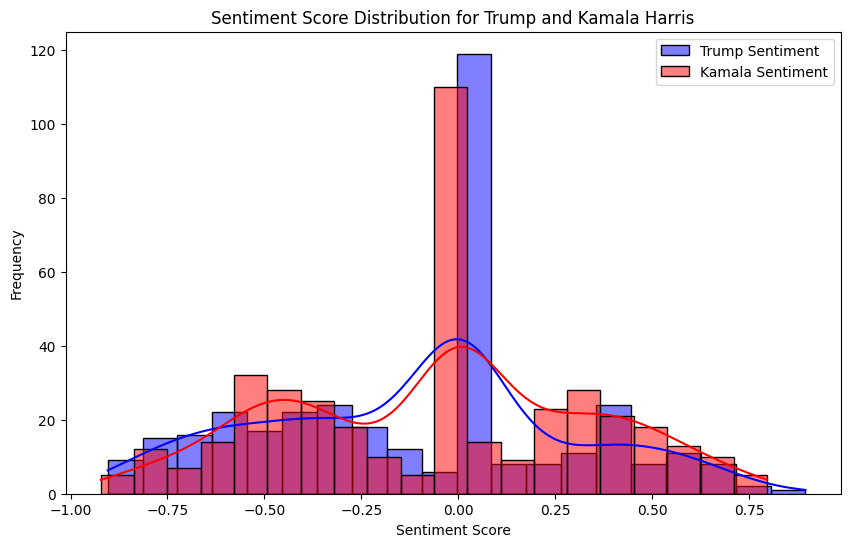

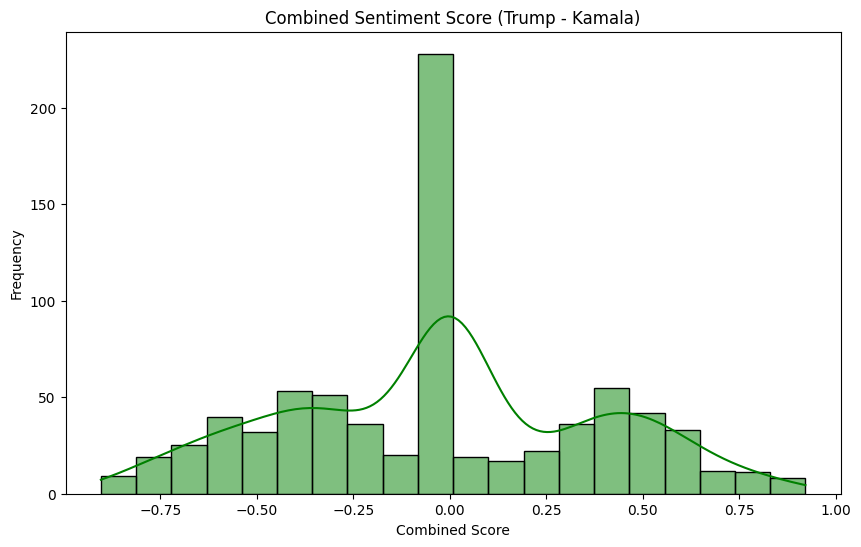

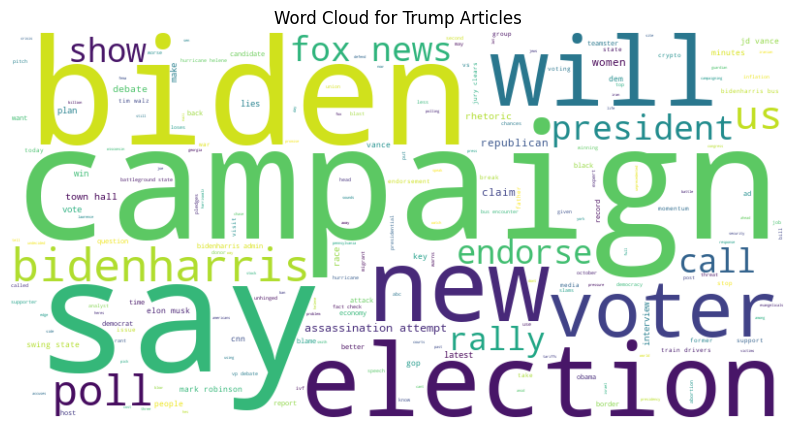

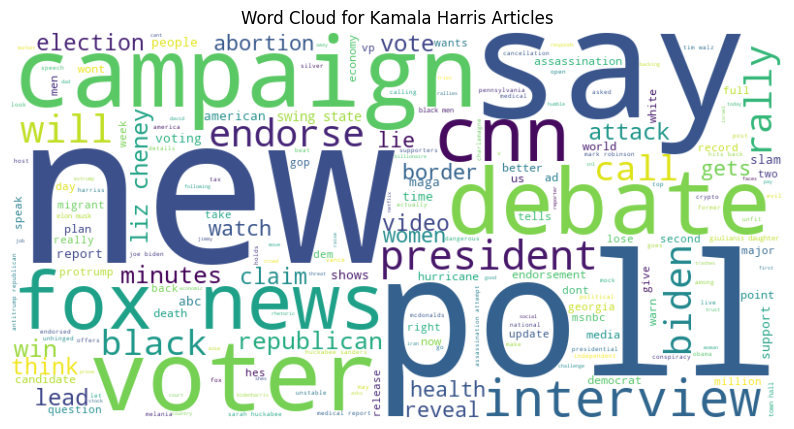

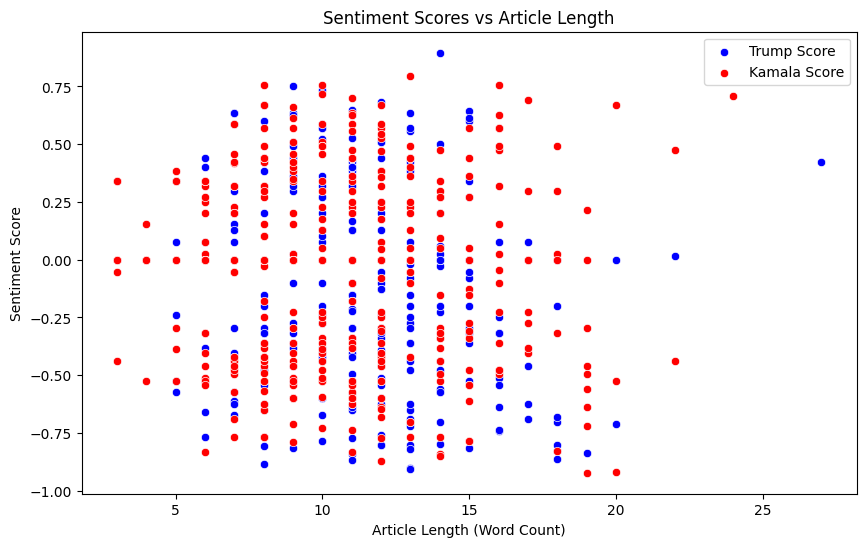

Most positive article for Trump: hes outstanding enthusiastic praise for mark robinson recirculates after candidates black nazi brag revealed
Most negative article for Trump: slams pelosis as sick and evil doubling down on enemy from within rhetoric
Most positive article for Kamala: charlamagne tha god ad on supporting taxpayerfunded surgery for transgender inmates was effective
Most negative article for Kamala: rages at fake news reporters over mcdonalds story in rally rant vows next week hell try french fry job


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df_trump = pd.DataFrame(trump_data)
df_harris = pd.DataFrame(harris_data)

df_trump = df_trump.rename(columns={'score': 'trump_score'})
df_harris = df_harris.rename(columns={'score': 'kamala_score'})

# Add a 'combined_score' column to reflect sentiment difference (Trump - Kamala)
df_trump['combined_score'] = df_trump['trump_score']
df_harris['combined_score'] = -df_harris['kamala_score']


df = pd.concat([df_trump, df_harris], ignore_index=True)

print(df.head())


print(df.describe())

print(f"Total number of articles: {len(df)}")

# Count articles favoring Trump (combined_score > 0) vs Kamala (combined_score < 0)
trump_favored = (df['combined_score'] > 0).sum()
kamala_favored = (df['combined_score'] < 0).sum()
print(f"Articles favoring Trump: {trump_favored}")
print(f"Articles favoring Kamala: {kamala_favored}")

# Distribution of Trump and Kamala sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df_trump['trump_score'], color='blue', label='Trump Sentiment', kde=True, bins=20)
sns.histplot(df_harris['kamala_score'], color='red', label='Kamala Sentiment', kde=True, bins=20)
plt.title('Sentiment Score Distribution for Trump and Kamala Harris')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Combined sentiment score (Trump - Kamala)
plt.figure(figsize=(10, 6))
sns.histplot(df['combined_score'], color='green', kde=True, bins=20)
plt.title('Combined Sentiment Score (Trump - Kamala)')
plt.xlabel('Combined Score')
plt.ylabel('Frequency')
plt.show()

# Function to create word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

trump_articles_text = " ".join(df_trump['article'])
kamala_articles_text = " ".join(df_harris['article'])

plot_wordcloud(trump_articles_text, "Word Cloud for Trump Articles")
plot_wordcloud(kamala_articles_text, "Word Cloud for Kamala Harris Articles")

df_trump['article_length'] = df_trump['article'].apply(lambda x: len(x.split()))
df_harris['article_length'] = df_harris['article'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='article_length', y='trump_score', data=df_trump, label='Trump Score', color='blue')
sns.scatterplot(x='article_length', y='kamala_score', data=df_harris, label='Kamala Score', color='red')
plt.title('Sentiment Scores vs Article Length')
plt.xlabel('Article Length (Word Count)')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

# Find the most positive/negative articles for Trump and Kamala
most_positive_trump = df_trump.loc[df_trump['trump_score'].idxmax()]['article']
most_negative_trump = df_trump.loc[df_trump['trump_score'].idxmin()]['article']
most_positive_kamala = df_harris.loc[df_harris['kamala_score'].idxmax()]['article']
most_negative_kamala = df_harris.loc[df_harris['kamala_score'].idxmin()]['article']

print(f"Most positive article for Trump: {most_positive_trump}")
print(f"Most negative article for Trump: {most_negative_trump}")
print(f"Most positive article for Kamala: {most_positive_kamala}")
print(f"Most negative article for Kamala: {most_negative_kamala}")
